In [2]:
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv("data/Normandy casualties-sylvain-spreadsheet.csv")
df

,Arrival-Time,casualties
0,0,200
1,0,202
2,0,202
3,0,206
4,0,203
...,...,...
70,700,1066
71,700,1067
72,700,1069
73,700,1116


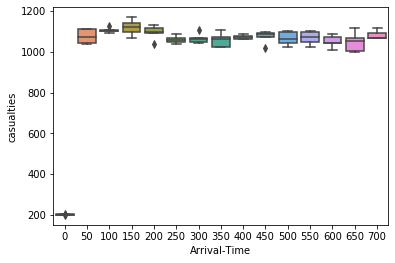

In [18]:
ax = sns.boxplot(x="Arrival-Time", y="casualties", data=df)

In [200]:
df = pd.read_csv("Normandy casualties-spreadsheet.csv", skiprows=6)
df = df.T
cols = df.iloc[0]
df.columns = list(cols[:-1]) + ["value"]
df = df.iloc[1:]
df["run"] = df.index.str.split(".", n=1).map(lambda x: x[0])
df = df.ffill()
df = df[["Arrival-Time", "[initial & final values]", "value", "run"]]\
    .groupby(["run", "Arrival-Time"]).apply(lambda x: x.T.iloc[2:3])\
    .reset_index(level=2, drop=True)
df.columns = ["casualties", "winner"]
df = df.reset_index(level=1)
df = df.astype(int)
df = df.sort_values(by=["Arrival-Time"])
df

,Arrival-Time,casualties,winner
run,,,
1,0,2157,0
7,0,2162,0
6,0,2161,0
2,0,2154,0
9,0,2162,0
...,...,...,...
357,700,1285,1
358,700,1360,1
359,700,1317,1


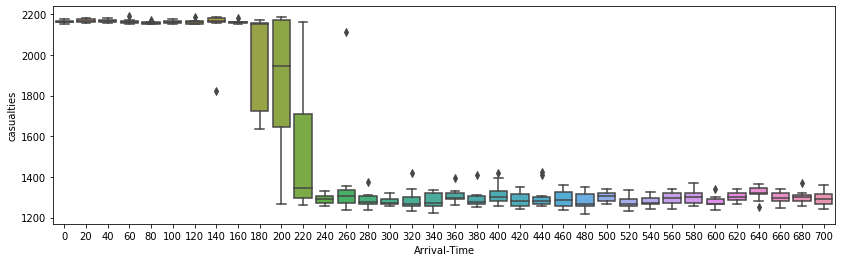

In [208]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x="Arrival-Time", y="casualties", data=df, ax=ax)
plt.show()

In [202]:
df.to_csv("new_data.csv")